<a href="https://www.kaggle.com/code/ahmedoshokr/eda-of-who-diabetes-mortality-data?scriptVersionId=123401720" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Diabetes Life Expectancy

## Backgroung:

I've always had an interest in new research and advancments in treatments for diabetes because I have a number of family members who are living with the condition. Over the years science has produces a lot of great breakthrough that helped increase the life expectancy of diabetic patients. The objective of this analysis is to visualize the effects of these breakthrough as well as extract any other insights from the data.

## Source:

The data is from WHO's data platform: https://platform.who.int/mortality/themes/theme-details/topics/topic-details/MDB/diabetes-mellitus-and-endocrine-disorders

## Note:

This is my first such project, any feedback, comments, pointers on things that could have been done better are more than welcome. Thank you.

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import warnings

# suppressing warnings
warnings.filterwarnings('ignore')


%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# importing the data
df = pd.read_csv('/kaggle/input/who-diabetes/WHOMortalityDatabase_Deaths - Copy.csv',index_col=False)

## Exploratory analysis of the data and processing

In [3]:
df.head()

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
0,EU,Europe,ALB,Albania,1987,All,Age_unknown,[Unknown],0.0,NaN,NaN,NaN
1,EU,Europe,ALB,Albania,1987,All,Age85_over,[85+],14.0,0.628931,NaN,140.000000
2,EU,Europe,ALB,Albania,1987,All,Age80_84,[80-84],11.0,0.671141,NaN,66.265060
3,EU,Europe,ALB,Albania,1987,All,Age75_79,[75-79],19.0,0.898345,NaN,61.688312
4,EU,Europe,ALB,Albania,1987,All,Age70_74,[70-74],31.0,1.716501,NaN,75.980392


In [4]:
# checking for null values
df.isnull().sum()

Region Code                                                         0
Region Name                                                         0
Country Code                                                        0
Country Name                                                        0
Year                                                                0
Sex                                                                 0
Age group code                                                      0
Age Group                                                           0
Number                                                           1446
Percentage of cause-specific deaths out of total deaths          8831
Age-standardized death rate per 100 000 standard population    256968
Death rate per 100 000 population                               20829
dtype: int64

In [5]:
# data is presented for males, females, and 'All'
# for the next part I only need the total so we'll have to drop female and male data
# we want to make sure that the numbers add up (male + female = All)
df['Sex'].value_counts()

All        89019
Male       89019
Female     89019
Unknown     2457
Name: Sex, dtype: int64

In [6]:
# checking to ensure that all the values combined will equal to the value in 'All'

df_count = df[['Sex','Number']]
df_group = df_count.groupby(['Sex'],as_index=False).sum(['Number'])
df_group

,Sex,Number
0,All,45450232.0
1,Female,25038268.0
2,Male,20407416.0
3,Unknown,4548.0


In [7]:
# let's find out if all other values combined sum up to 'All'
if sum(df_group['Number'][1:]) == df_group['Number'][0]:
    print("It's okay to delete gendered data")

It's okay to delete gendered data


In [8]:
# according to the results above, it should be fine to delete gendered data
df_1 = df[df.Sex == 'All']
df_1['Sex'].value_counts()

All    89019
Name: Sex, dtype: int64

In [9]:
# next let's take a look at the values in the "Age Group" column
df_1['Age Group'].value_counts()

[Unknown]    4239
[35-39]      4239
[0]          4239
[1-4]        4239
[5-9]        4239
[10-14]      4239
[15-19]      4239
[20-24]      4239
[25-29]      4239
[30-34]      4239
[40-44]      4239
[85+]        4239
[45-49]      4239
[50-54]      4239
[55-59]      4239
[60-64]      4239
[65-69]      4239
[70-74]      4239
[75-79]      4239
[80-84]      4239
[All]        4239
Name: Age Group, dtype: int64

In [10]:
# as we can see the values are binned, and there are values "unknown" and "all" that can interfere with the analysis
# I want to drop these values but let's see if it's safe to do so
# first, as we did with gendered data, I want to see what is the "number" value for each of the age groups

df_1_count = df_1[['Age Group','Number']]
df_1_group = df_1_count.groupby(['Age Group'],as_index=False).sum(['Number'])
df_1_group

,Age Group,Number
0,[0],207371.0
1,[1-4],127401.0
2,[10-14],61473.0
3,[15-19],86306.0
4,[20-24],132841.0
5,[25-29],204747.0
6,[30-34],269090.0
7,[35-39],342543.0
8,[40-44],469588.0
9,[45-49],699075.0


In [11]:
# now to see if "All" values really do equal to the all other values combined
if sum(df_1_group['Number'][0:19]) + df_1_group['Number'][20] == df_1_group['Number'][19]:
    print('We can go ahead and drop "All"')

We can go ahead and drop "All"


In [12]:
# we got our answer, it's safe to drop "All", but first let's take advantage of it and see how much is "Unknown" out of the total
print((df_1_group['Number'][20] / df_1_group['Number'][19]) * 100)

0.056866596412533166


In [13]:
# considering that it is one twentieth of one percent I am going to go ahead and drop both "All" and "Unknown"
df_1.drop(df_1[(df_1['Age Group'] == '[Unknown]') | (df_1['Age Group'] == '[All]')].index,inplace=True)
df_1['Age Group'].value_counts()

[85+]      4239
[35-39]    4239
[1-4]      4239
[5-9]      4239
[10-14]    4239
[15-19]    4239
[20-24]    4239
[25-29]    4239
[30-34]    4239
[40-44]    4239
[80-84]    4239
[45-49]    4239
[50-54]    4239
[55-59]    4239
[60-64]    4239
[65-69]    4239
[70-74]    4239
[75-79]    4239
[0]        4239
Name: Age Group, dtype: int64

In [14]:
# our first analysis will look into the meadian age of death of a diabetic per year globally
# for that we only need the columns: Year, country, age group, and number
df_byage = df_1[['Year','Country Name','Age Group','Number']]
df_byage.head()

,Year,Country Name,Age Group,Number
1,1987,Albania,[85+],14.0
2,1987,Albania,[80-84],11.0
3,1987,Albania,[75-79],19.0
4,1987,Albania,[70-74],31.0
5,1987,Albania,[65-69],16.0


In [15]:
df_byage_gr = df_byage.groupby(['Year','Age Group'], as_index=False).sum('Number')
df_byage_gr.head()

,Year,Age Group,Number
0,1950,[0],2102.0
1,1950,[1-4],1394.0
2,1950,[10-14],420.0
3,1950,[15-19],623.0
4,1950,[20-24],797.0


In [16]:
# we need to do some adjustments to the values in the 'Age Group' Column in order for the median finder function we're going to build to work
df_byage_gr['Age Group'].replace('[0]','[0-0]',inplace=True)
df_byage_gr['Age Group'].replace('[85+]','[85-85]',inplace=True)


# Median age of death per year:

### Since the data is grouped the actual median is not going be possible to determine but we can estimate using the below formula

$
Median = l + \frac{\frac{N}{2}\ - F}{f}\ * h
$

### where
l = lower limit of the median class

f = frequency of the median class

F = cumulative frequency of the class preceding the median class

N = total number of observations

h = width of the median class

In [17]:
# function to retrieve the median of a group


def get_median(df_temp):
    decon = []
    for _ in range(19):
        # deconstrucing each age group into a list of the lowest value, the highest value, and the midpoint
        x,y = df_temp['Age Group'].iloc[_].replace('[','').replace(']','').split('-')
        z = (int(x) + int(y)) / 2
        decon.append([int(x),int(y),z])
    df_temp['decon'] = decon
    
    # adding a column with the cumilative fequency 
    # frequency is the number of times for each age group, which is the value in 'Number'
    cumil_freq = [df_temp['Number'].iloc[0]]
    l = 1
    while l < len(df_temp):
        cf = df_temp['Number'].iloc[l] + cumil_freq[l - 1]
        cumil_freq.append(cf)
        l += 1
    df_temp['Cumilative Frequency'] = cumil_freq


    # median group is the group (age group) that contains the median. It will have the freq just above N/2 
    # where N is the total number of occurences, finding N
    middle_value = sum(df_temp['Number'])/2
    middle_value

    # now we need the median group, the freq of the median group, and thecumilative frequency for the group before median group
    for s in range(len(df_temp)):
        if df_temp['Cumilative Frequency'].iloc[s] > middle_value:
            median_group = df_temp['decon'].iloc[s]
            CF_before_mg = df_temp['Cumilative Frequency'].iloc[s-1]
            mg_freq = df_temp['Number'].iloc[s]
            break
    
    # finally to calculate the median
    the_median = median_group[0] + ((sum(df_temp['Number'])/2 - CF_before_mg)/mg_freq) * (median_group[1] - median_group[0]) 
    return the_median
    
    
    

In [18]:
# in the next portion we will be splitting the dataframe into groups by year, and getting the median for each year
# we'll store the year/median pairs in a dicts out of which we will create the dataframe that we will use in the first graph



def median_year(the_data):
    the_year = 1950
    medians = []
    while the_year <= max(the_data['Year']):
        df_temp = the_data[the_data.Year == the_year]
        the_median = get_median(df_temp)
        medians.append({'Year':df_temp.iloc[0,0],'Median':the_median})
        the_year += 1
    return medians

medians = median_year(df_byage_gr)

# this is the dataframe we will use in the graphs hallalujah
yearly_median = pd.DataFrame.from_dict(medians)
yearly_median.head()

,Year,Median
0,1950,65.974854
1,1951,66.217488
2,1952,66.335635
3,1953,66.862044
4,1954,66.954554


In [19]:
yearly_median.reset_index(inplace=True)
yearly_median

,index,Year,Median
0,0,1950,65.974854
1,1,1951,66.217488
2,2,1952,66.335635
3,3,1953,66.862044
4,4,1954,66.954554
...,...,...,...
66,66,2016,72.849084
67,67,2017,72.961633
68,68,2018,72.493135
69,69,2019,72.792014


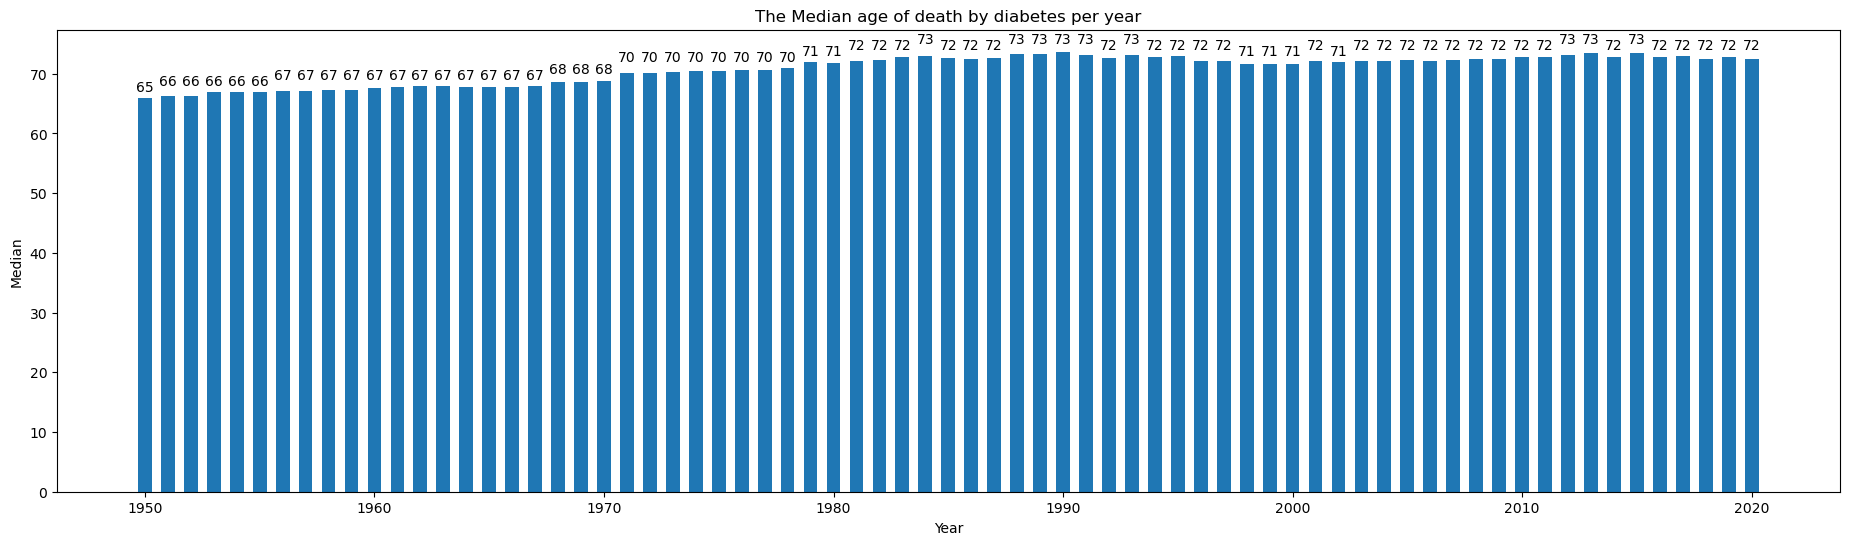

In [20]:
# now we have a dataframe with each year and the median age at which patients died due to diabetes/diabetic related disorder
# we can now plot it


# creating a list of the Years for use in the data label function
year = 1950
the_years = []
while year <= 2020:
    the_years.append(year)
    year += 1

# creating a list of the Medians for use in the data label function
medians_list = []
for med in yearly_median['Median']:
    medians_list.append(int(med))

    
# function to add data labels on each bar of the graph
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i]+2,y[i],ha = 'center',fontsize=10)


fig = plt.figure(figsize =(23,6))
plt.bar(yearly_median['Year'],yearly_median['Median'],width=0.6)

addlabels(the_years,medians_list)

plt.xlabel('Year')
plt.ylabel('Median')
plt.title('The Median age of death by diabetes per year')
plt.show()

As we can see, the median age at which a diabetic person dies has rose steadily over the years, but tappered around the mid 90s up until present day (the data ends at 2020). Remember that this analysis does not differentiate by country or sex. Let's see the results when we separate the sexes.

In [21]:
# going back to the earlier data with Male/Female separation, we'll go through the same process twice, once for male data and once for female data
df_female = df[df.Sex == 'Female']
df_male = df[df.Sex == 'Male']


In [22]:
# we'll also remove the "All" and "Unknown" age groups
df_female.drop(df_female[(df_female['Age Group'] == '[Unknown]') | (df_female['Age Group'] == '[All]')].index,inplace=True)
df_male.drop(df_male[(df_male['Age Group'] == '[Unknown]') | (df_male['Age Group'] == '[All]')].index,inplace=True)


In [23]:
# grouping by age groupe
df_byage_male = df_male[['Year','Country Name','Age Group','Number']]
df_byage_female = df_female[['Year','Country Name','Age Group','Number']]
df_byage_gr_male = df_byage_male.groupby(['Year','Age Group'], as_index=False).sum('Number')
df_byage_gr_female = df_byage_female.groupby(['Year','Age Group'], as_index=False).sum('Number')


In [24]:
# adjusting the value to aid in median finding
df_byage_gr_female['Age Group'].replace('[0]','[0-0]',inplace=True)
df_byage_gr_female['Age Group'].replace('[85+]','[85-85]',inplace=True)
df_byage_gr_male['Age Group'].replace('[0]','[0-0]',inplace=True)
df_byage_gr_male['Age Group'].replace('[85+]','[85-85]',inplace=True)



In [25]:
# now we can use the predefined functions we used earlier to get the medians per year
medians_female = median_year(df_byage_gr_female)
medians_male = median_year(df_byage_gr_male)



In [26]:
yearly_median_male = pd.DataFrame.from_dict(medians_male)
yearly_median_female = pd.DataFrame.from_dict(medians_female)

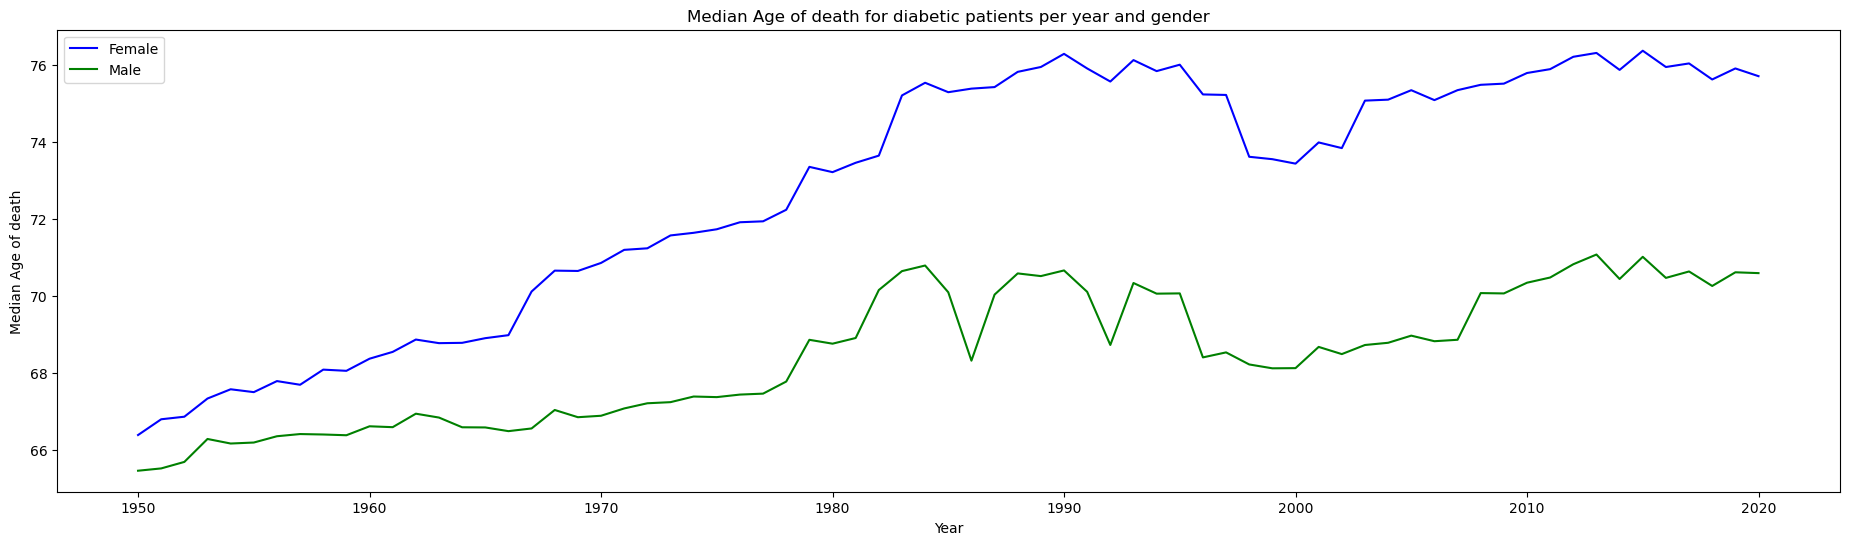

In [27]:
fig = plt.figure(figsize =(23,6))

plt.plot(yearly_median_female['Year'],yearly_median_female['Median'],color='b',label='Female')
plt.plot(yearly_median_male['Year'],yearly_median_male['Median'],color='g',label='Male')
plt.legend()


plt.xlabel('Year')
plt.ylabel('Median Age of death')
plt.title('Median Age of death for diabetic patients per year and gender')

plt.show()


We see a similar trend to what we saw in the grouped data. A steady increase in life expectency which seems to taper around the mid 90s. Although in this plot we can see that the life expectency of women diabetic is generally higher than that of men.

# Death rate per 100 000 population

One of the parameters the dataset contains is Death rate per 100 000 population which we can use as an indication to see if some countries have a higher death rate from diabetes than others.

In [28]:
# first let's get rid of rows that would duplicate data
# as we saw above Age Group = 'All' And Sex = 'All' account for the total of each grouping
# we also want the most relevant data so we'll only filter by the last ten years
df_l10 = df[df.Year >= 2010]

df_drpp = df_l10.drop(df_l10[(df_l10['Age Group'] == '[All]') | (df_l10['Sex'] == 'All')].index)

# selecting the country and Death rate per 100 000 population columns and grouping.
df_drpp = df_drpp[['Country Name','Death rate per 100 000 population']].groupby('Country Name',as_index=False).mean()

In [29]:
# sorting the vvalues
df_drpp.sort_values(by='Death rate per 100 000 population',ascending=True,inplace=True)

# removing countries with no available data
df_drpp.dropna(inplace=True)

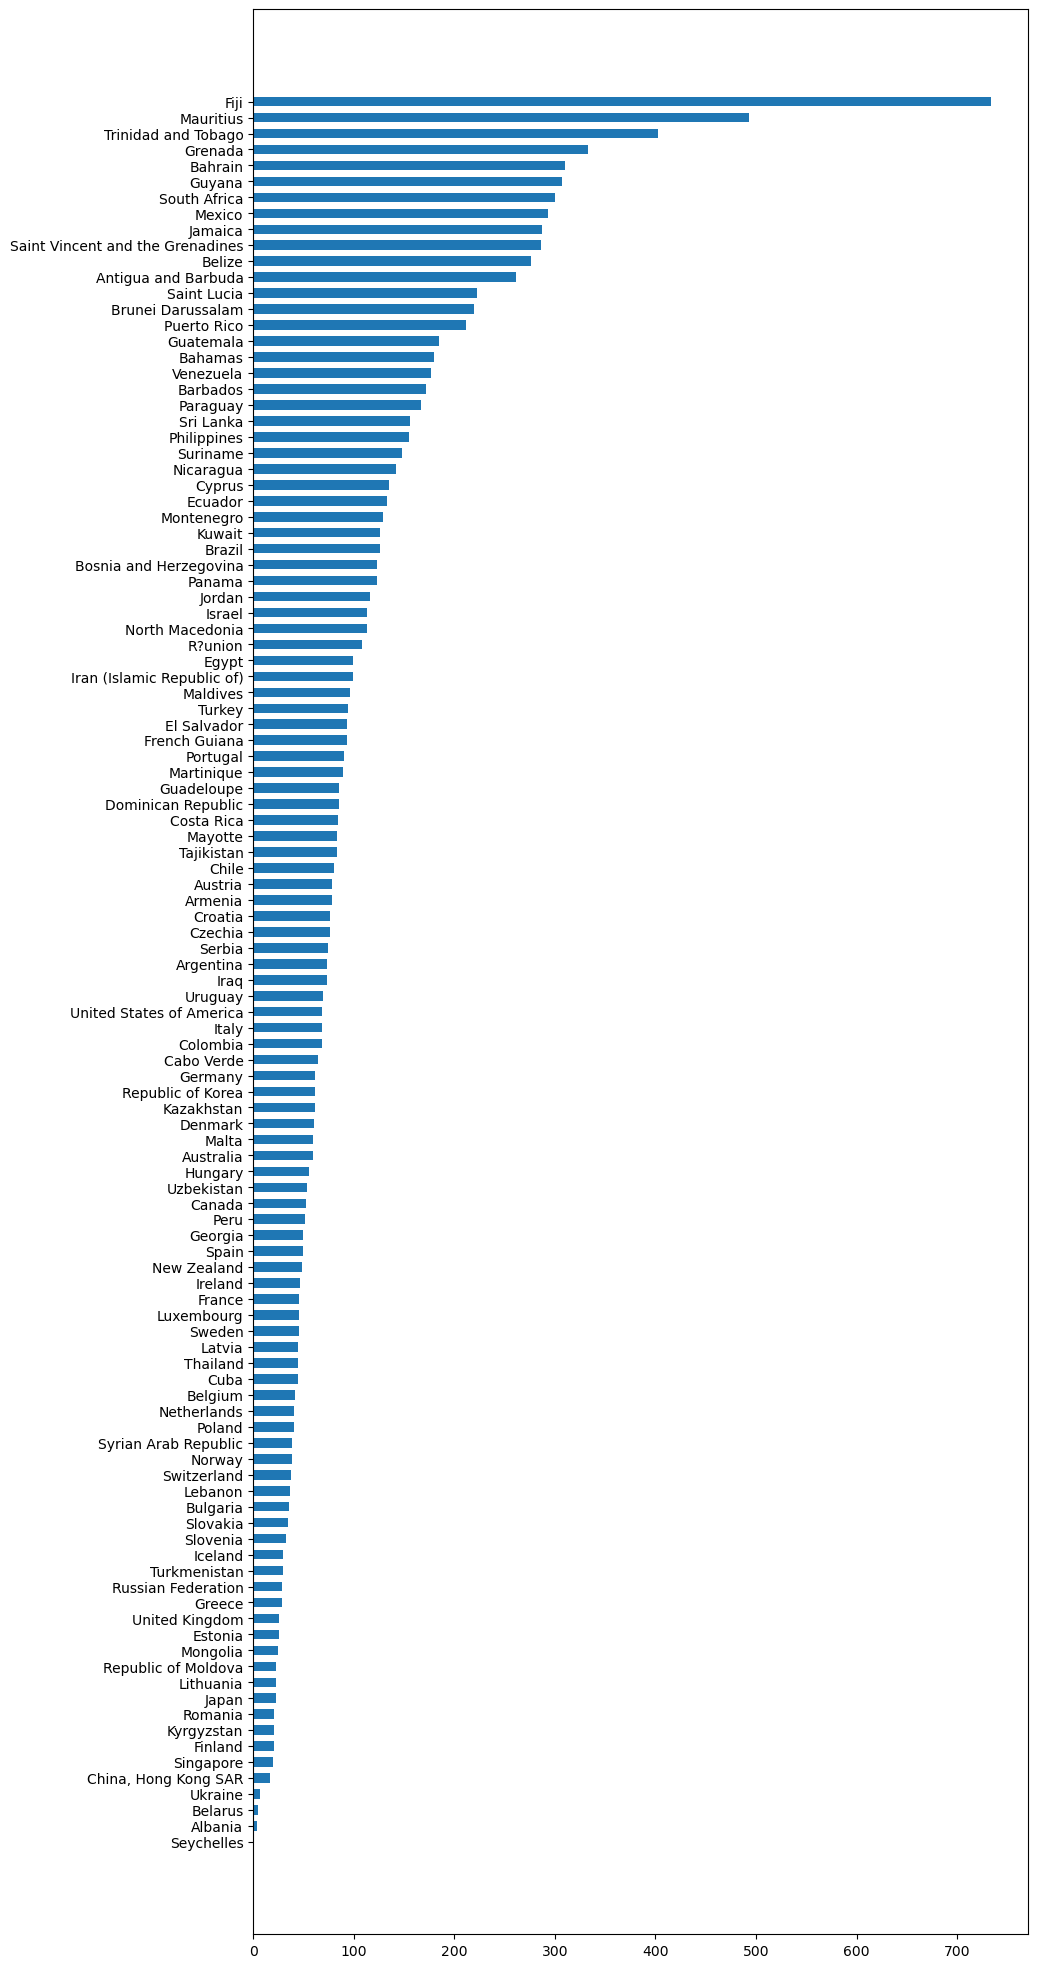

In [30]:
fig2 = plt.figure(figsize = (10,25))
plt.barh(df_drpp['Country Name'],df_drpp['Death rate per 100 000 population'],height=0.6)
plt.xlabel = 'Death rate per 100 000 population'
plt.ylabel = 'Country Name'
plt.title = 'Death rate per 100 000 population per Country'

plt.show()
